#Pascal VOC Dataset

In [ ]:
#http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar 에서 다운로드 가능 http://host.robots.ox.ac.uk/pascal/VOC/voc2012/ 사이트 주소

In [1]:
!wget 'http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar'

--2021-09-29 00:20:26--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  12.2MB/s    in 2m 39s  

2021-09-29 00:23:05 (12.0 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [2]:
%pwd

'/content'

In [3]:
ls -la

total 1952796
drwxr-xr-x 1 root root       4096 Sep 29 00:20 ./
drwxr-xr-x 1 root root       4096 Sep 29 00:16 ../
drwxr-xr-x 4 root root       4096 Sep 16 13:39 .config/
drwxr-xr-x 1 root root       4096 Sep 16 13:40 sample_data/
-rw-r--r-- 1 root root 1999639040 Jan  1  2019 VOCtrainval_11-May-2012.tar


In [4]:
mkdir data

In [5]:
ls -al

total 1952800
drwxr-xr-x 1 root root       4096 Sep 29 00:24 ./
drwxr-xr-x 1 root root       4096 Sep 29 00:16 ../
drwxr-xr-x 4 root root       4096 Sep 16 13:39 .config/
drwxr-xr-x 2 root root       4096 Sep 29 00:24 data/
drwxr-xr-x 1 root root       4096 Sep 16 13:40 sample_data/
-rw-r--r-- 1 root root 1999639040 Jan  1  2019 VOCtrainval_11-May-2012.tar


In [ ]:
!tar -xvf 'VOCtrainval_11-May-2012.tar' -C ./data

In [15]:
cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000027.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000027.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>486</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>174</xmin>
			<ymin>101</ymin>
			<xmax>349</xmax>
			<ymax>351</ymax>
		</bndbox>
		<part>
			<name>head</name>
			<bndbox>
				<xmin>169</xmin>
				<ymin>104</ymin>
				<xmax>209</xmax>
				<ymax>146</ymax>
			</bndbox>
		</part>
		<part>
			<name>hand</name>
			<bndbox>
				<xmin>278</xmin>
				<ymin>210</ymin>
				<xmax>297</xmax>
				<ymax>233</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot</name>
			<bndbox>
				<xmin>273</xmin>
				<ymin>333</ymin>
				<xmax>297</xmax>
				<ymax>354</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot<

* annotations 에서는 클래스, 객체정보등이 들어있다.
*imagesets는 txt파일의 이미지 셋이 있고
* jpeg에는 jpeg파일의 이미지 셋이 있다.
* segmentationclass는 같은 클래스끼리 같은 색으로 묶은 것이고
* segmantationObject는 각각의 객체끼리 다른 색으로 분류한 것이다.

In [40]:
import xml.etree.ElementTree as ET
import os
import cv2
import matplotlib.pyplot as plt

In [11]:
xml_file = '/content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml'

In [14]:
xml_file.imsho

'/content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml'

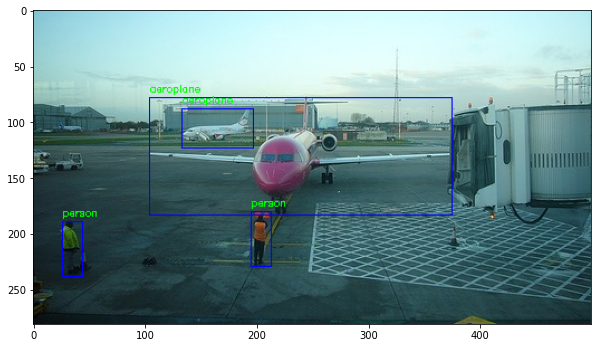

In [56]:
tree = ET.parse(xml_file) #파일 읽기
root = tree.getroot() #최상단 태그가 현 위치다.
img_dir = '/content/data/VOCdevkit/VOC2012/JPEGImages/'

img_name = root.find('filename').text #해당 태그 행 가져오기
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)

objects = root.findall('object') # 해당 이미지는 비행기와 사람 등 4개의 객체를 분류
object_list = []

img_full_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_full_path)
dst = img.copy()

for obj in objects:
  box = obj.find('bndbox')
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = [x1, y1, x2, y2]
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(255, 1, 1), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, color=(0, 255, 0), thickness=1, fontScale=0.3)

  object_dict = {'calss_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


In [20]:
object_list

[{'bndbox_coor': [104, 78, 375, 183], 'calss_name': 'aeroplane'},
 {'bndbox_coor': [133, 88, 197, 123], 'calss_name': 'aeroplane'},
 {'bndbox_coor': [195, 180, 213, 229], 'calss_name': 'person'},
 {'bndbox_coor': [26, 189, 44, 238], 'calss_name': 'person'}]

In [24]:
img_full_path

'/content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'

# MS CoCo DataSet

In [58]:
!wget "http://images.cocodataset.org/zips/train2017.zip"

--2021-09-29 01:38:01--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.87.212
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.87.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  62.4MB/s    in 5m 56s  

2021-09-29 01:43:57 (51.8 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [68]:
!wget 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

--2021-09-29 01:54:44--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.167.97
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.167.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  74.9MB/s    in 3.5s    

2021-09-29 01:54:48 (69.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [60]:
mkdir data2

In [ ]:
!unzip 'train2017.zip' -d /content/data2/

In [69]:
!unzip 'annotations_trainval2017.zip' -d /content/data2/

Archive:  annotations_trainval2017.zip
  inflating: /content/data2/annotations/instances_train2017.json  
  inflating: /content/data2/annotations/instances_val2017.json  
  inflating: /content/data2/annotations/captions_train2017.json  
  inflating: /content/data2/annotations/captions_val2017.json  
  inflating: /content/data2/annotations/person_keypoints_train2017.json  
  inflating: /content/data2/annotations/person_keypoints_val2017.json  


In [64]:
!wget 'http://images.cocodataset.org/zips/val2017.zip'

--2021-09-29 01:52:39--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.10.252
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  73.9MB/s    in 12s     

2021-09-29 01:52:50 (67.2 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [65]:
!unzip 'val2017.zip' -d /content/data2/


 extracting: /content/data2/val2017/000000255718.jpg  
 extracting: /content/data2/val2017/000000552371.jpg  
 extracting: /content/data2/val2017/000000470952.jpg  
 extracting: /content/data2/val2017/000000039405.jpg  
 extracting: /content/data2/val2017/000000016010.jpg  
 extracting: /content/data2/val2017/000000470173.jpg  
 extracting: /content/data2/val2017/000000459437.jpg  
 extracting: /content/data2/val2017/000000045472.jpg  
 extracting: /content/data2/val2017/000000277020.jpg  
 extracting: /content/data2/val2017/000000282912.jpg  
 extracting: /content/data2/val2017/000000314034.jpg  
 extracting: /content/data2/val2017/000000148730.jpg  
 extracting: /content/data2/val2017/000000101068.jpg  
 extracting: /content/data2/val2017/000000407960.jpg  
 extracting: /content/data2/val2017/000000022396.jpg  
 extracting: /content/data2/val2017/000000541634.jpg  
 extracting: /content/data2/val2017/000000288762.jpg  
 extracting: /content/data2/val2017/000000439426.jpg  
 extracti

In [70]:
!ls -la /content/data2/annotations/

total 814884
drwxr-xr-x 2 root root      4096 Sep 29 01:55 .
drwxr-xr-x 5 root root      4096 Sep 29 01:54 ..
-rw-rw-r-- 1 root root  91865115 Sep  1  2017 captions_train2017.json
-rw-rw-r-- 1 root root   3872473 Sep  1  2017 captions_val2017.json
-rw-rw-r-- 1 root root 469785474 Sep  1  2017 instances_train2017.json
-rw-rw-r-- 1 root root  19987840 Sep  1  2017 instances_val2017.json
-rw-rw-r-- 1 root root 238884731 Sep  1  2017 person_keypoints_train2017.json
-rw-rw-r-- 1 root root  10020657 Sep  1  2017 person_keypoints_val2017.json


In [71]:
!sudo apt-get install jq

In [73]:
!jq . /content/data2/annotations/instances_val2017.json > output.json

In [ ]:
!head -200 output.json #해당 json에는 이미지에 대한 path나 width, height가 들어있다. #앞부분 따오기 = head

In [ ]:
!tail -800 output.json #뒷부분 따오기 = tail

In [76]:
!grep -n 'annotations' output.json #output.json에서 annotation이 있는 라인을 찾아준다.

50054:  "annotations": [


In [77]:
!head -50400 output.json

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      "id": 473869
    },
    {
      "license": 3,
      "file_name": "000000074092.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000074092.jpg",
      "height": 500,
      "width": 332,
      "date_captured": "2013-11-23 05:20:33",
      "flickr_url": "http://farm1.staticflickr.com/158/370824877_ea2b7b2138_z.jpg",
      "id": 74092
    },
    {
      "license": 3,
      "file_name": "000000390902.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000390902.jpg",
      "height": 500,
      "width": 333,
      "date_captured": "2013-11-23 05:25:33",
      "flickr_url": "http://farm1.staticflickr.com/82/242688429_19ec870de2_z.jpg",
      "id": 390902
    },
    {
      "license": 5,
      "file_name": "000000513688.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000513688.jpg",
      "height": 480,
      "width": 640,
      "date_captured": "2013-11-23 20:18:29",
      "flickr_url": "http://farm8.st